In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Deep learning models

In [5]:
df_resale = pd.read_csv("../data/cleaned/resale_price_cleaned.csv")

/var/folders/pf/xn094ngs70lb3jh0xpvlzx8c0000gn/T/ipykernel_19871/2757938304.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


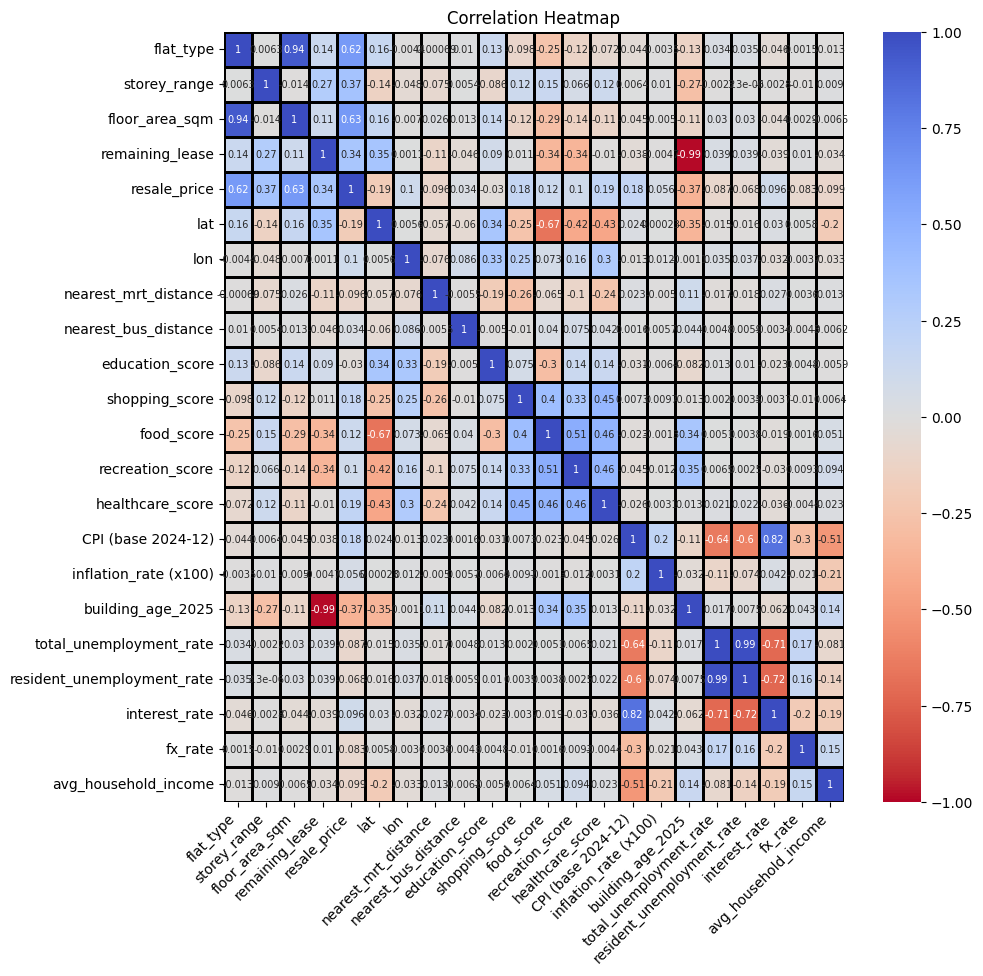

In [6]:
# Correlation heatmap
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(df_resale.select_dtypes(include=['int64','float64']).corr(), annot = True, fmt='.2g', 
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1, annot_kws={"size": 7})
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
fig.show()

***Do we want to remove variables with high multicollinearity?

### Simple Neural Network

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

label_encoders = {}
df_resale['month'] = pd.to_datetime(df_resale['month'])
df_resale['year'] = df_resale['month'].dt.year.astype('int')

for col in df_resale.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_resale[col] = le.fit_transform(df_resale[col])
    label_encoders[col] = le  

X = df_resale.drop(columns=['resale_price', 'month'])
y = df_resale['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

nn_predictions = nn_model.predict(X_test_scaled)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### RNN

In [8]:
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
rnn_model.fit(X_train_rnn, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
rnn_predictions = rnn_model.predict(X_test_rnn)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

### LSTM

In [ ]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.fit(X_train_rnn, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
lstm_predictions = lstm_model.predict(X_test_rnn)


## Evaluation

In [ ]:
def evaluate_model(true_values, predictions):
    r2 = r2_score(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    mae = mean_absolute_error(true_values, predictions)
    return r2, rmse, mae

nn_r2, nn_rmse, nn_mae = evaluate_model(y_test, nn_predictions)
print(f"Neural Network - R²: {nn_r2:.4f}, RMSE: {nn_rmse:.2f}, MAE: {nn_mae:.2f}")

rnn_r2, rnn_rmse, rnn_mae = evaluate_model(y_test, rnn_predictions)
print(f"RNN - R²: {rnn_r2:.4f}, RMSE: {rnn_rmse:.2f}, MAE: {rnn_mae:.2f}")

lstm_r2, lstm_rmse, lstm_mae = evaluate_model(y_test, lstm_predictions)
print(f"LSTM - R²: {lstm_r2:.4f}, RMSE: {lstm_rmse:.2f}, MAE: {lstm_mae:.2f}")
